In [24]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ufift\event-risk-management\merged_file.csv")

In [25]:
df.shape

(69311, 10)

In [26]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Display number of rows before and after cleaning
print("Rows before cleaning:", df.shape[0])
print("Rows after cleaning:", df_cleaned.shape[0])

Rows before cleaning: 69311
Rows after cleaning: 45703


In [27]:
# Convert the "Vehicle" column to String type
df_cleaned["Vehicle"] = df_cleaned["Vehicle"].astype(str)

# Verify the change
print(df_cleaned["Vehicle"].dtype)  # Should print 'object' (string in pandas)

object


C:\Users\ufift\AppData\Local\Temp\ipykernel_9404\668391800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Vehicle"] = df_cleaned["Vehicle"].astype(str)


In [28]:
# Create the 'Delayed' variable based on 'Min Delay'
df_cleaned["Delayed"] = (df_cleaned["Min Delay"] > 0).astype(int)

# Display the first few rows to verify
print(df_cleaned[["Min Delay", "Delayed"]].head())

   Min Delay  Delayed
0          3        1
1          0        0
2          0        0
7          6        1
8          5        1


C:\Users\ufift\AppData\Local\Temp\ipykernel_9404\3419480174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Delayed"] = (df_cleaned["Min Delay"] > 0).astype(int)


In [29]:
# Count occurrences where Min Delay = 0 and Min Delay > 0
min_delay_counts = {
    "Min Delay = 0": (df_cleaned["Min Delay"] == 0).sum(),
    "Min Delay > 0": (df_cleaned["Min Delay"] > 0).sum()
}

# Convert to DataFrame for better readability
min_delay_counts_df = pd.DataFrame.from_dict(min_delay_counts, orient="index", columns=["Count"])

# Display the counts
print(min_delay_counts_df)

               Count
Min Delay = 0  19429
Min Delay > 0  26274


In [30]:
# Define the list of five stations to keep
selected_stations = ["BLOOR STATION", "KIPLING STATION", "FINCH STATION", "EGLINTON STATION", "KENNEDY BD STATION"]  # Replace with actual station names

# Filter the dataset to keep only these stations
df_cleaned = df_cleaned[df_cleaned["Station"].isin(selected_stations)]

# Display the number of remaining records
print("Rows after keeping only selected stations:", df_cleaned.shape[0])

Rows after keeping only selected stations: 7746


In [31]:
import pandas as pd

# Generate statistics for the 'Bound' variable
bound_stats = df_cleaned["Bound"].describe(include="all")

# Display the statistics
print(bound_stats)

count     7746
unique       5
top          S
freq      3099
Name: Bound, dtype: object


In [32]:
# Count occurrences of each unique value in Bound
bound_counts = df_cleaned["Bound"].value_counts()

# Display the counts
print(bound_counts)


Bound
S    3099
N    1971
W    1351
E    1323
B       2
Name: count, dtype: int64


In [33]:
# Remove rows where Bound = B
df_cleaned = df_cleaned[df_cleaned["Bound"] != "B"]

In [34]:
import pandas as pd

# Define seasons based on the month
def categorize_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Convert "Date" column to datetime format (if not already)
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

# Apply the function to categorize each date into a season
df_cleaned["Season"] = df_cleaned["Date"].apply(categorize_season)

# Remove the "Date" column after categorizing into seasons
df_cleaned = df_cleaned.drop(columns=["Date"], errors="ignore")

# Display the first few rows to verify
print(df_cleaned.head())



     Time     Day             Station   Code  Min Delay  Min Gap Bound Line  \
1   02:30  Sunday     KIPLING STATION   MUIS          0        0     E   BD   
14  08:24  Sunday    EGLINTON STATION    SUG          6       12     S   YU   
16  08:38  Sunday    EGLINTON STATION  TUNOA          6       12     N   YU   
18  10:54  Sunday    EGLINTON STATION  PUSRA          4        8     S   YU   
36  21:57  Sunday  KENNEDY BD STATION   EUVA          6       12     W   BD   

   Vehicle  Delayed  Season  
1     5341        0  Winter  
14    5771        1  Winter  
16    6131        1  Winter  
18    5851        1  Winter  
36    5141        1  Winter  


In [35]:
# Define time categories based on the hour of the day
def categorize_time(time):
    hour = int(time.split(":")[0])  # Extract hour from time string
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the function to categorize each time into a time period
df_cleaned["Time Period"] = df_cleaned["Time"].apply(categorize_time)

# Remove the original "Time" column

df_cleaned = df_cleaned.drop(columns=["Time"], errors="ignore")

# Display the first few rows to verify

print(df_cleaned.head())


       Day             Station   Code  Min Delay  Min Gap Bound Line Vehicle  \
1   Sunday     KIPLING STATION   MUIS          0        0     E   BD    5341   
14  Sunday    EGLINTON STATION    SUG          6       12     S   YU    5771   
16  Sunday    EGLINTON STATION  TUNOA          6       12     N   YU    6131   
18  Sunday    EGLINTON STATION  PUSRA          4        8     S   YU    5851   
36  Sunday  KENNEDY BD STATION   EUVA          6       12     W   BD    5141   

    Delayed  Season Time Period  
1         0  Winter       Night  
14        1  Winter     Morning  
16        1  Winter     Morning  
18        1  Winter     Morning  
36        1  Winter       Night  


In [36]:
import pandas as pd

# Define a dictionary mapping each Code to its corresponding category
issue_categories = {
    "Electrical and Mechanical Systems (Train Equipment & Power)": 
        ["EUAC", "ERAC", "EUAL", "EUATC", "EUCH", "EUHV", "ERHV", "EULT", "ERLT", "EULV", 
         "ERLV", "EUPI", "ERPR", "EUSC", "MUSC", "EUTM", "EUTL", "ERTL", "PRSP", "PUSTP", 
         "PUSCA", "PUSI", "PUSIO", "PUSIS", "PUSNT", "TUDOE", "TRDOE"],

    "Train Operations & Control Systems": 
        ["ERTC", "PRSA", "PUSAC", "PRSL", "PRSO", "PUATC", "PRSW", "PRTST", "PUSTS", "PUCBI", 
         "PUCSS", "PUSLC", "PUTSC", "PUCSS", "PUDCS", "PUOPO", "PUSBE", "PUSSW", "PUSTC", 
         "PUSWZ", "PUSZC", "TUCC", "TRTC", "TUSET", "TRSET"],

    "Structural & Track-Related Issues": 
        ["PRW", "PUTR", "PUTTP", "PUTCD", "PUTD", "PUTIJ", "PUTNT", "PUTO", "PUTOE", "TUOPO", 
         "PUTS", "PUTSM", "PUTTC", "PUTWZ", "PUSO"],

    "Human & Operational Factors": 
        ["MUESA", "TUNOA", "TRNOA", "TUKEY", "TUML", "TUMVS", "TUNIP", "TRNIP", "TUO", "TRO", 
         "TUOS", "TUS", "TUSC", "TUSUP", "MUWR", "MUIE", "MRIE", "SUAE", "SRAE", "SUCOL", 
         "SRCOL", "SUEAS", "SREAS", "PUSEA", "SUO", "SRO"],

    "Miscellaneous & Passenger-Related Incidents": 
        ["EUDO", "ERDO", "EUOE", "MUCL", "MRCL", "MUEC", "MREC", "MUGD", "MUODC", "MUPAA", 
         "MRPAA", "PUMEL", "PREL", "PRO", "PRS", "PUMST", "PRST", "PUMO", "MUTO", "MUO", "MRO"]
}

# Create a function to categorize issues based on their Code
def categorize_issue(code):
    for category, codes in issue_categories.items():
        if code in codes:
            return category
    return "Other"  # Default category if not found

# Apply the categorization to create a new column "Issue Category"
df_cleaned["Issue Category"] = df_cleaned["Code"].apply(categorize_issue)

# Display the first few rows to verify the categorization
print(df_cleaned[["Code", "Issue Category"]].head())


     Code               Issue Category
1    MUIS                        Other
14    SUG                        Other
16  TUNOA  Human & Operational Factors
18  PUSRA                        Other
36   EUVA                        Other


In [37]:
import pandas as pd

# Count occurrences of each Issue Category
issue_category_counts = df_cleaned["Issue Category"].value_counts()

# Convert to DataFrame for better readability
issue_category_counts_df = issue_category_counts.to_frame().reset_index()
issue_category_counts_df.columns = ["Issue Category", "Count"]

# Display the counts
print(issue_category_counts_df)


                                      Issue Category  Count
0                                              Other   3879
1                        Human & Operational Factors   1683
2        Miscellaneous & Passenger-Related Incidents   1097
3  Electrical and Mechanical Systems (Train Equip...    544
4                 Train Operations & Control Systems    396
5                  Structural & Track-Related Issues    145


In [38]:
df_cleaned

,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Delayed,Season,Time Period,Issue Category
1,Sunday,KIPLING STATION,MUIS,0,0,E,BD,5341,0,Winter,Night,Other
14,Sunday,EGLINTON STATION,SUG,6,12,S,YU,5771,1,Winter,Morning,Other
16,Sunday,EGLINTON STATION,TUNOA,6,12,N,YU,6131,1,Winter,Morning,Human & Operational Factors
18,Sunday,EGLINTON STATION,PUSRA,4,8,S,YU,5851,1,Winter,Morning,Other
36,Sunday,KENNEDY BD STATION,EUVA,6,12,W,BD,5141,1,Winter,Night,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
69248,Tuesday,KIPLING STATION,MUI,3,6,W,BD,5077,1,Winter,Afternoon,Other
69250,Tuesday,FINCH STATION,PUOPO,0,0,S,YU,5791,0,Winter,Afternoon,Train Operations & Control Systems
69268,Tuesday,KENNEDY BD STATION,TUSC,0,0,E,BD,5324,0,Winter,Evening,Human & Operational Factors
69287,Tuesday,KIPLING STATION,TUSC,0,0,W,BD,5323,0,Winter,Night,Human & Operational Factors


In [39]:
import pandas as pd

# Remove specified columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=["Delay Band", "Code"], errors="ignore")

# Display the first few rows to verify
print(df_cleaned.head())

       Day             Station  Min Delay  Min Gap Bound Line Vehicle  \
1   Sunday     KIPLING STATION          0        0     E   BD    5341   
14  Sunday    EGLINTON STATION          6       12     S   YU    5771   
16  Sunday    EGLINTON STATION          6       12     N   YU    6131   
18  Sunday    EGLINTON STATION          4        8     S   YU    5851   
36  Sunday  KENNEDY BD STATION          6       12     W   BD    5141   

    Delayed  Season Time Period               Issue Category  
1         0  Winter       Night                        Other  
14        1  Winter     Morning                        Other  
16        1  Winter     Morning  Human & Operational Factors  
18        1  Winter     Morning                        Other  
36        1  Winter       Night                        Other  


In [40]:
# Reorder the columns in df_cleaned
df_cleaned = df_cleaned[[
    "Delayed", "Season", "Day", "Time Period", 
    "Station", "Bound", "Line", "Min Gap", "Issue Category"
]]

# Display the first few rows to verify the order
print(df_cleaned.head())

    Delayed  Season     Day Time Period             Station Bound Line  \
1         0  Winter  Sunday       Night     KIPLING STATION     E   BD   
14        1  Winter  Sunday     Morning    EGLINTON STATION     S   YU   
16        1  Winter  Sunday     Morning    EGLINTON STATION     N   YU   
18        1  Winter  Sunday     Morning    EGLINTON STATION     S   YU   
36        1  Winter  Sunday       Night  KENNEDY BD STATION     W   BD   

    Min Gap               Issue Category  
1         0                        Other  
14       12                        Other  
16       12  Human & Operational Factors  
18        8                        Other  
36       12                        Other  


In [41]:
df_cleaned.to_csv("df_cleaned.csv", index=False)

In [42]:
from sklearn.preprocessing import LabelEncoder

# Encode "Season" as numerical values
le_season = LabelEncoder()
df_cleaned["Season"] = le_season.fit_transform(df_cleaned["Season"])

# Count occurrences of delays by season
season_counts = df_cleaned["Season"].value_counts()

# Encode "Day" as numerical values
le_season = LabelEncoder()
df_cleaned["Day"] = le_season.fit_transform(df_cleaned["Day"])

# Encode "Station" as numerical values
le_season = LabelEncoder()
df_cleaned["Station"] = le_season.fit_transform(df_cleaned["Station"])

# Encode "Bound" as numerical values
le_season = LabelEncoder()
df_cleaned["Bound"] = le_season.fit_transform(df_cleaned["Bound"])

# Encode "Station" as numerical values
le_season = LabelEncoder()
df_cleaned["Line"] = le_season.fit_transform(df_cleaned["Line"])

# Encode "Issue Category" as numerical values
le_season = LabelEncoder()
df_cleaned["Issue Category"] = le_season.fit_transform(df_cleaned["Issue Category"])

# Encode "Time Period" as numerical values
le_season = LabelEncoder()
df_cleaned["Time Period"] = le_season.fit_transform(df_cleaned["Time Period"])

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Encode categorical variables
categorical_features = ["Day", "Station", "Bound", "Line", "Season", "Time Period", "Issue Category"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store encoders for future use

# Define the target variable and predictor variables
X = df_cleaned.drop(columns=["Delayed","Min Gap"])  # All variables except "Delayed"
y = df_cleaned["Delayed"]  # Target variable (1 = delayed, 0 = not delayed)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (improves model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display model performance metrics
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Logistic Regression Model Performance:
Accuracy: 0.62
Precision: 0.64
Recall: 0.87

Confusion Matrix:
[[140 466]
 [120 823]]


C:\Users\ufift\AppData\Local\Temp\ipykernel_9404\582941505.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


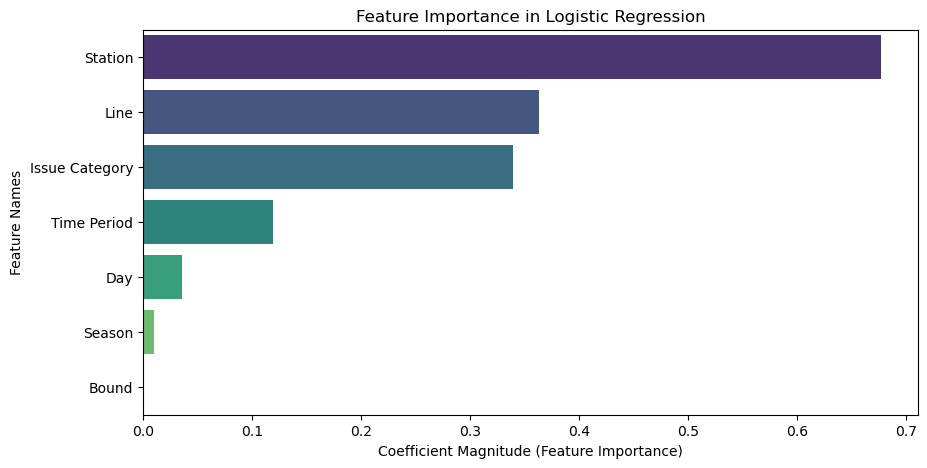

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Get Feature Importance (Absolute Coefficients)
feature_importance = np.abs(log_model.coef_[0])

# Create DataFrame for Visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.xlabel("Coefficient Magnitude (Feature Importance)")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Logistic Regression")
plt.show()


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)


# Display model performance metrics
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(conf_matrix)


Random Forest Model Performance:
Accuracy: 0.66
Precision: 0.72
Recall: 0.74

Confusion Matrix:
[[329 277]
 [242 701]]


C:\Users\ufift\AppData\Local\Temp\ipykernel_9404\2822684852.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


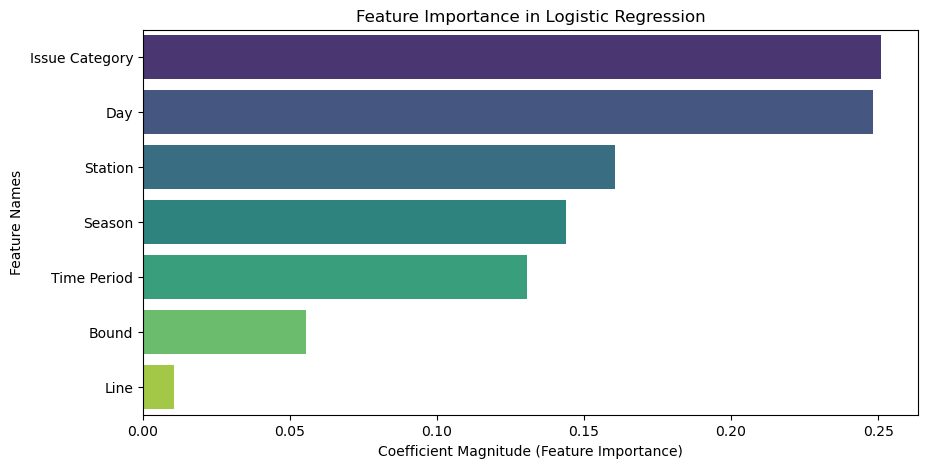

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Get Feature Importance (Absolute Coefficients)
feature_importance = rf_model.feature_importances_

# Create DataFrame for Visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.xlabel("Coefficient Magnitude (Feature Importance)")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Logistic Regression")
plt.show()